# Question(提出问题)

According to the film <Titanic>, I remember that the main plot while escaping，as ship accident occurred , the female children first, and male after them. 


Question：Is the plot of the film responding to what actually happened just like lady first?

Question：Is the age will affect Survived.

question : Any other influencing factors?

# Wrangle(数据整理)

In [667]:
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

check the data construction

In [668]:
import unicodecsv
def read_csv(file_name):
    with open(file_name, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
titanic_data = read_csv('titanic_data.csv')
print titanic_data[0]

{u'Fare': u'7.25', u'Name': u'Braund, Mr. Owen Harris', u'Embarked': u'S', u'Age': u'22', u'Parch': u'0', u'Pclass': u'3', u'Sex': u'male', u'Survived': u'0', u'SibSp': u'1', u'PassengerId': u'1', u'Ticket': u'A/5 21171', u'Cabin': u''}


In [669]:
titanic_df=pd.read_csv('titanic_data.csv')

In [670]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Age Cabin Embarked lost some  data

In [671]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


# 从以上结果可以看出，样本数量为891，Age Canin Embarked 存在缺失

Survived：是否存活（0代表否，1代表是）

Pclass：船舱等级（1代表一等舱，2代表二等舱，3代表三等舱）

Name：船上乘客的名字

Sex：船上乘客的性别

# Age：船上乘客的年龄（存在数据缺失）见下面代码 random age，range (mean - std， mean + std),在这个区域随机生成补充数据

SibSp：乘客在船上的兄弟姐妹和配偶的数量

Parch：乘客在船上的父母以及小孩的数量

Ticket：乘客船票的编号

Fare：乘客为船票支付的费用

Cabin：乘客所在船舱的编号

# Embarked：乘客上船的港口（C 代表从 Cherbourg 登船，Q 代表从 Queenstown 登船，S 代表从 Southampton 登船）（存在三个缺失，用众数填充）

根据电影情节主要研究不同因素对乘客获救与否的影响Sex、Age、Pclass影响重点研究，SibSp、Parch、Fare作为次重点研究，Name，Ticket，Cabin， PassengerId影响不具代表性 不做研究。

缺失数据在研究时根据众数，平均值，偏差填充

# Explore(数据探索)

Find the average of Survived % from describe all item of titanic_df

In [672]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survived% is only 38.38%

Count the survived and Victim Passenger

In [673]:
num_survived = titanic_df['Survived'].sum()
num_no_survived = 891 - num_survived

print num_survived
print num_no_survived

342
549


draw a Figure  to show Survived and Victim

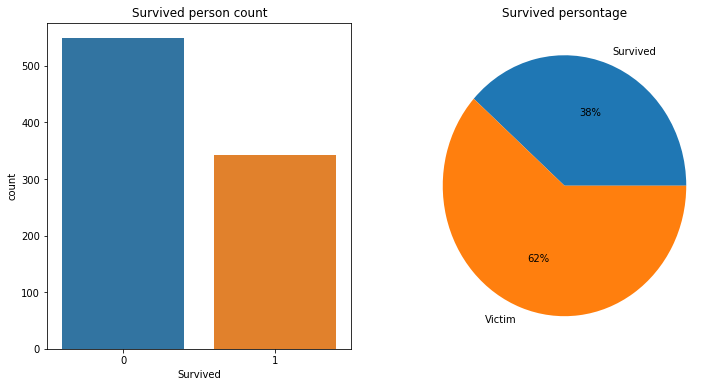

In [674]:
plt.figure(figsize = (12,6))
plt.subplot(121)
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survived person count')

plt.subplot(122)
plt.pie([num_survived, num_no_survived],labels=['Survived','Victim'],autopct='%1.0f%%')
plt.title('Survived persontage') 

plt.show()

# Firstly According to the film, I prefer to check the persentage of female survived 

step 1  I should check how many male and female on Titanic before wrecked

In [675]:
male_sum = titanic_df['Sex'][titanic_df['Sex'] == 'male'].count()
female_sum = titanic_df['Sex'][titanic_df['Sex'] == 'female'].count()
print male_sum
print female_sum

577
314


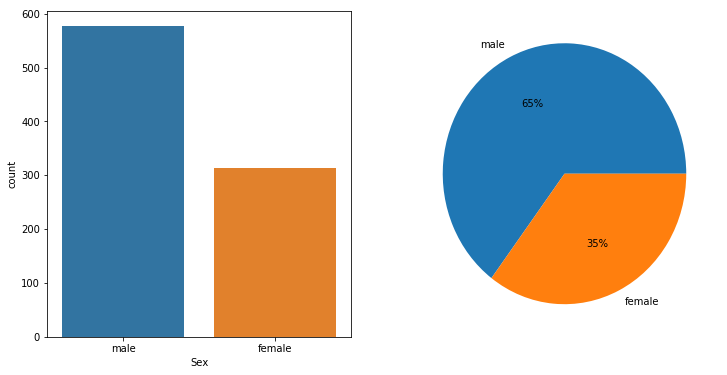

In [676]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='Sex', data=titanic_df)
plt.subplot(122)
plt.pie([male_sum,female_sum],labels=['male', 'female'],autopct='%1.0f%%')
plt.show()


There are 577 male, and 314 female before wrecked

step 2  I should check how many male and female on Titanic after wrecked

In [677]:
survived_df = titanic_df[titanic_df[ 'Survived'] == 1 ]

In [619]:
survived_male_sum = survived_df['Sex'][survived_df['Sex'] == 'male'].count()
survived_female_sum = survived_df['Sex'][survived_df['Sex'] == 'female'].count()
print survived_male_sum 
print survived_female_sum

109
233


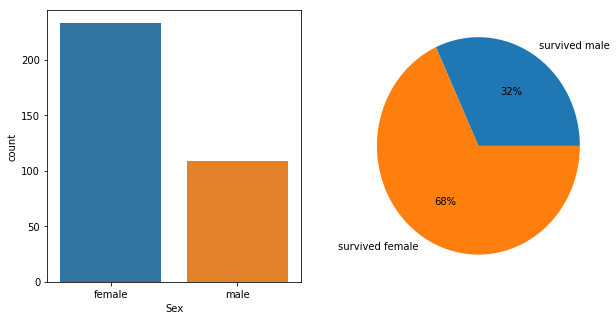

In [620]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Sex', data=survived_df)
plt.subplot(122)
plt.pie([survived_male_sum, survived_female_sum],labels=['survived male', 'survived female'],autopct='%1.0f%%')
plt.show()

The survived female 109 is more than male 233,

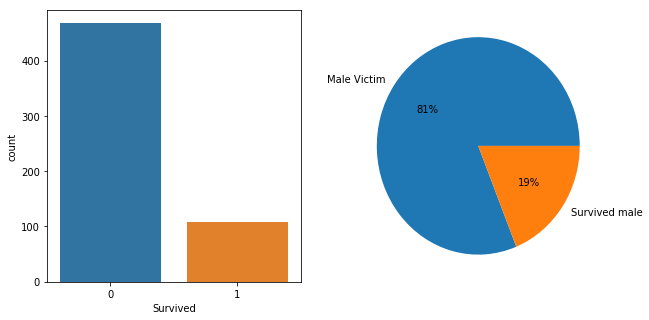

In [621]:
male_df = titanic_df[titanic_df['Sex'] == 'male']

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = male_df)
plt.subplot(122)
plt.pie([male_df['Survived'][male_df['Survived'] == 0].count(),male_df['Survived'][male_df['Survived'] == 1].count()],labels=['Male Victim', 'Survived male'],autopct='%1.0f%%')
plt.show()

#Survived persentage of male

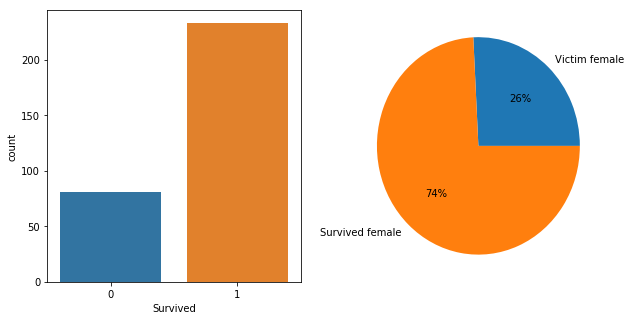

In [622]:
female_df = titanic_df[titanic_df['Sex'] == 'female']

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = female_df)
plt.subplot(122)
plt.pie([female_df['Survived'][female_df['Survived'] == 0].count(),female_df['Survived'][female_df['Survived'] == 1].count()],labels=['Victim female', 'Survived female'],autopct='%1.0f%%')
plt.show()



 #the survived female 74% percentage is higher than male 19%， Titanic film tells us the true,from the result above.

#Secondly,I prefre to check the Survived age. as the Titanic Film.
# I found the some of the age data is lost; we need to fill in  the lost age of data.

In [623]:
avg_age_titanic   = titanic_df["Age"].mean()
std_age_titanic   = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()


rand_age = np.random.randint(avg_age_titanic - std_age_titanic, avg_age_titanic + std_age_titanic, size = count_nan_age_titanic)

titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_age

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#random age，range (mean - std， mean + std)

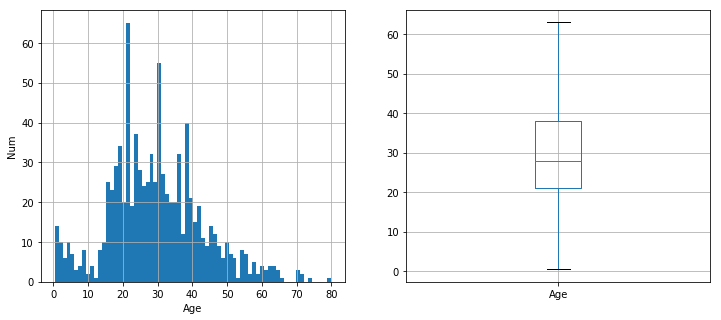

In [624]:
plt.figure(figsize=(12,5))
plt.subplot(121)
titanic_df['Age'].hist(bins = 70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
titanic_df.boxplot(column='Age', showfliers=False)

plt.show()

#acccording to the hist, I found the age data Concentrated in the peak age between 20-40 years of age，the boxplot may show the result  visually。

In [625]:
titanic_df['Age'].describe()


count    891.000000
mean      29.596150
std       13.560475
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#According to the sample,total 891, the avg is  29.59, std  13.54,the youngest is 0.42, the eldest is 80.

# before analysis the age result,I group the age data to children,Teenagers，adult，and elderly people 4 groups

In [626]:
bins = [0, 12, 18, 65, 100]
titanic_df['Age_group'] = pd.cut(titanic_df['Age'], bins)
by_age = titanic_df.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 12]      0.579710
(12, 18]     0.357895
(18, 65]     0.371349
(65, 100]    0.125000
Name: Survived, dtype: float64

#the Survived persontage of children is higher than Teenagers and adult, the elderly people  is lowest.

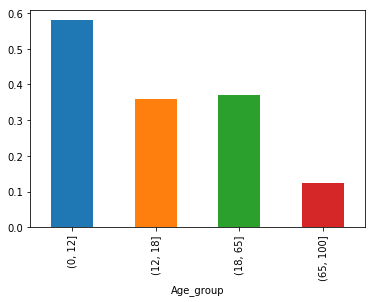

In [627]:
by_age.plot(kind = "bar")

#Survived persentage by different Pclass

In [628]:
titanic_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


#  Thirdly, analysis data from the Pclass before the Ship wreck

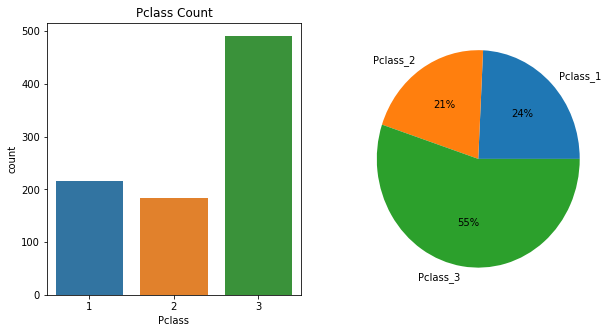

In [629]:
plt.figure(figsize= (10 ,5))
plt.subplot(121)
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Pclass Count') 

plt.subplot(122)
plt.pie(titanic_df[['Pclass','Survived']].groupby(['Pclass']).count(),labels=['Pclass_1','Pclass_2','Pclass_3'],autopct='%1.0f%%')

plt.show()


In [630]:
survived_df[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


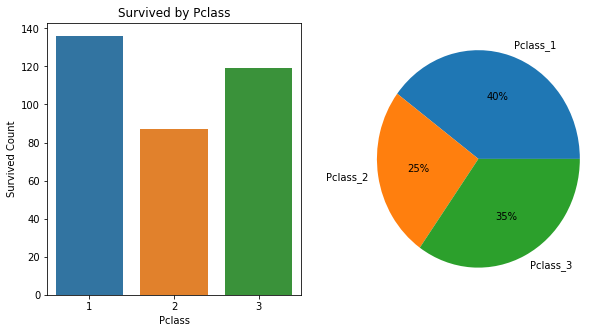

In [631]:
plt.figure(figsize= (10, 5))
plt.subplot(121)
sns.countplot(x='Pclass', data=survived_df)
plt.title('Survived by Pclass') 
plt.ylabel('Survived Count')

plt.subplot(122)
plt.pie(survived_df[['Pclass','Survived']].groupby(['Pclass']).sum(),labels=['Pclass_1','Pclass_2','Pclass_3'],autopct='%1.0f%%')
plt.show()

In [632]:
bins = [0 ,1, 2, 3]
titanic_df['Pclass_group'] = pd.cut(titanic_df['Pclass'], bins)
by_Pclass = titanic_df.groupby('Pclass_group')['Survived'].mean()
by_Pclass
# the percentage and count of Survived from Pclass_1 is highest

Pclass_group
(0, 1]    0.629630
(1, 2]    0.472826
(2, 3]    0.242363
Name: Survived, dtype: float64

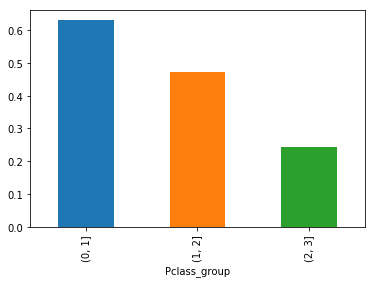

In [633]:
by_Pclass.plot(kind = "bar")

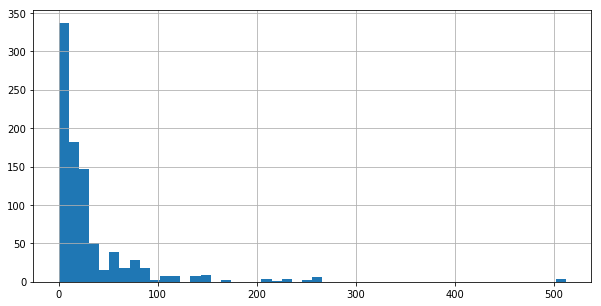

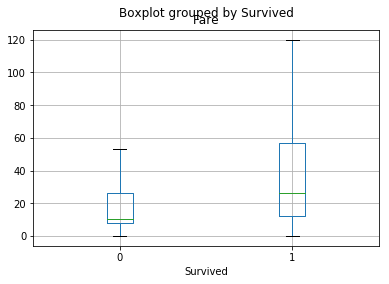

In [634]:
#Survived by Fare
plt.figure(figsize=(10,5))
titanic_df['Fare'].hist(bins = 50)

titanic_df.boxplot(column='Fare', by='Survived', showfliers=False)
plt.show()

#the Survived Passenger in higher Fare is higher than lower Fare

# check the data lost Embarked

In [635]:
titanic_df[titanic_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Pclass_group
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,"(18, 65]","(0, 1]"
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,"(18, 65]","(0, 1]"


# lost the Embarked of 2 and  u'Ticket is all 113572,the others 1135**'s Embarked is S，and mode is also S

In [636]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

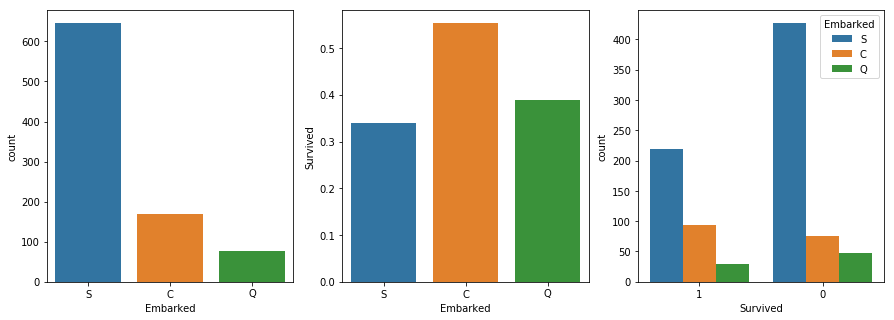

In [637]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5)) 

sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis2)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis3)


# Survived by have sibling or not

In [638]:
sibsp_df = titanic_df[titanic_df['SibSp'] != 0]
no_sibsp_df = titanic_df[titanic_df['SibSp'] == 0]

#Survived passager in Embarked S is largest，EmbarkedS Q is Minimum。Survived percentage in Embarked C is highest and S is lowest。

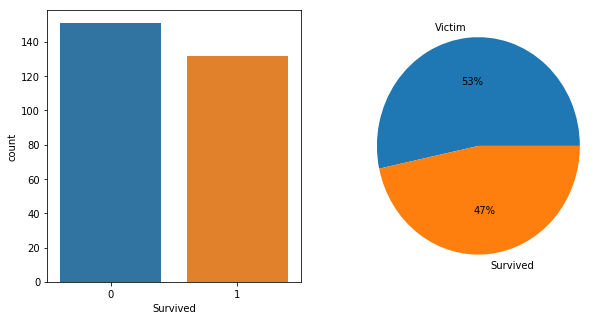

151 132


In [639]:
#the psassageer
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = sibsp_df )

plt.subplot(122)
plt.pie([sibsp_df['Survived'][sibsp_df['Survived'] == 0].count(),sibsp_df['Survived'].sum()],labels=['Victim', 'Survived'],autopct='%1.0f%%')
plt.show()
print sibsp_df['Survived'][sibsp_df['Survived'] == 0].count(), sibsp_df['Survived'].sum()

#the count of survived passagers have siblings is 132, survived percentage is 47%,higher than the average 38%

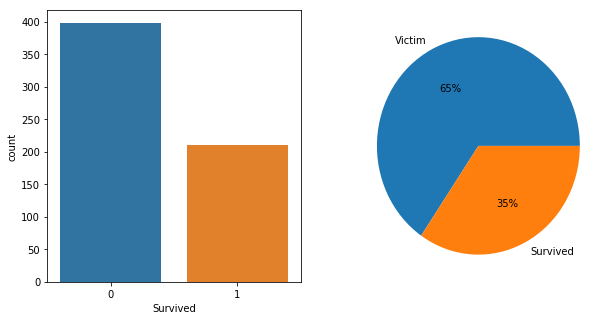

398 210


In [640]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = no_sibsp_df )

plt.subplot(122)
plt.pie([no_sibsp_df['Survived'][no_sibsp_df['Survived'] == 0].count(),no_sibsp_df['Survived'].sum()],labels=['Victim', 'Survived'],autopct='%1.0f%%')
plt.show()
print no_sibsp_df['Survived'][no_sibsp_df['Survived'] == 0].count(), no_sibsp_df['Survived'].sum()
#the count of Survived passsage have no siblings is 210, percentage is 35%,lower than the passsage have siblings.

In [641]:
# Survived by Parch
parch_df = titanic_df[titanic_df['Parch'] != 0]
no_parch_df = titanic_df[titanic_df['Parch'] == 0]

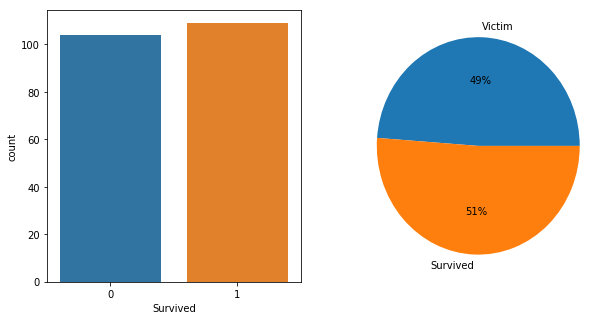

104 109


In [642]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = parch_df )

plt.subplot(122)
plt.pie([parch_df['Survived'][parch_df['Survived'] == 0].count(),parch_df['Survived'].sum()],labels=['Victim', 'Survived'],autopct='%1.0f%%')
plt.show()
print parch_df['Survived'][parch_df['Survived'] == 0].count(),parch_df['Survived'].sum()

the count of survived passagers have parent is 109, and the survived percentage is 51%

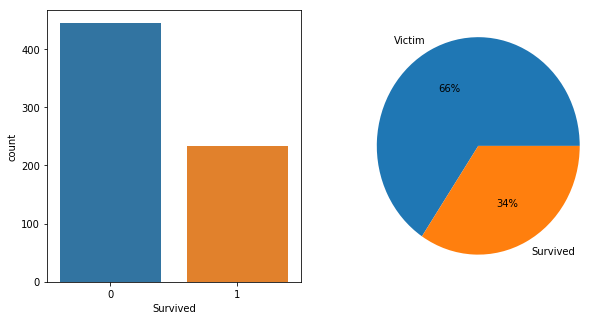

445 233


In [643]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = no_parch_df)

plt.subplot(122)
plt.pie([no_parch_df['Survived'][no_parch_df['Survived'] == 0].count(),no_parch_df['Survived'].sum()],labels=['Victim', 'Survived'],autopct='%1.0f%%')
plt.show()
print no_parch_df['Survived'][no_parch_df['Survived'] == 0].count(),no_parch_df['Survived'].sum()

#the count of survived passagers have no parent is 233, and the survived percentage is 34%
#the survived percentage of passengers have parent together is highter than passengers have no parent together 

# Draw Conclusions(得出结论)

To analyst the Survived result in Titanic data,  The main influencing factors age and sex I assumed at beginning,seems effected to the result.however the result is limited to the sample only, the whole data of Titanic is much more than 891.

1.Sex, the Male passenagers at begining is 577 ,and female is 314;after the ship crash,the survived female 109 is more than male 233;

2.Age, before analysis the age result,I group the age data to children,Teenagers，adult，and elderly people 4 groups,the Survived persontage of children is higher than Teenagers and adult, the elderly people is lowest.

3.Pclass, the three Pclass from 1 to 3 are 216 184 491, after the ship crash, the three Pclass from 1 to 3 are 136 87 119.the Survived persentage from high to low is 1>2>3.

4. other factors like the siblings SibSp Parch not effect the result much.

As we check the sample only, we can see the relashionship between the Sex, Age, Pclass factors and Survived, only can result the Correlation， not the Absolute cause and effect.

# Communicate(交流)

In [644]:
data_by_location = titanic_df.groupby(['Sex','Age'],as_index=False).mean()

In [645]:
data_by_location.head()

,Sex,Age,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,female,0.75,557.500000,1.000000,3.0,2.0,1.0,19.258300
1,female,1.00,277.500000,1.000000,3.0,0.5,1.5,13.437500
2,female,2.00,379.666667,0.333333,2.5,1.5,1.5,43.245833
3,female,3.00,209.500000,0.500000,2.5,2.0,1.5,31.327100
4,female,4.00,451.600000,1.000000,2.6,0.8,1.2,22.828340


In [646]:
data_by_location.head()['Age']

0    0.75
1    1.00
2    2.00
3    3.00
4    4.00
Name: Age, dtype: float64

In [647]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [648]:
scaled_entries_1 = (data_by_location['Survived']/data_by_location['Survived'].std())

Text(0,0.5,u'Age')

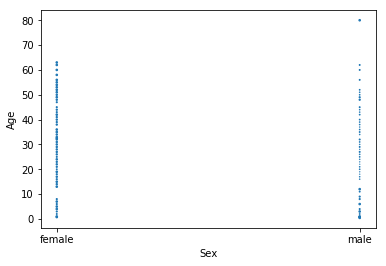

In [649]:
plt.scatter(data_by_location['Sex'],data_by_location['Age'],s=scaled_entries_1)
plt.xlabel('Sex')
plt.ylabel('Age')

#female survived percentage is higher than male

In [650]:
data_by_location = titanic_df.groupby(['Pclass','Age'],as_index=False).mean()

In [651]:
data_by_location.head()

,Pclass,Age,PassengerId,Survived,SibSp,Parch,Fare
0,1,0.92,306.0,1.0,1.0,2.0,151.5500
1,1,2.00,298.0,0.0,1.0,2.0,151.5500
2,1,4.00,446.0,1.0,0.0,2.0,81.8583
3,1,11.00,803.0,1.0,1.0,2.0,120.0000
4,1,14.00,436.0,1.0,1.0,2.0,120.0000


In [652]:
data_by_location.head()['Age']

0     0.92
1     2.00
2     4.00
3    11.00
4    14.00
Name: Age, dtype: float64

In [653]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [654]:
scaled_entries_2 = (data_by_location['Survived']/data_by_location['Survived'].std())

Text(0,0.5,u'Pclass')

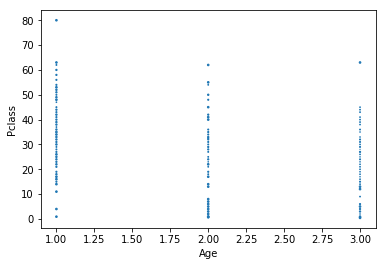

In [655]:
plt.scatter(data_by_location['Pclass'],data_by_location['Age'],s=scaled_entries_2)
plt.xlabel('Age')
plt.ylabel('Pclass')

In [656]:
data_by_location = titanic_df.groupby(['Fare','Age'],as_index=False).mean()

In [657]:
data_by_location.head()

,Fare,Age,PassengerId,Survived,Pclass,SibSp,Parch
0,0.0,16.0,346.0,0.0,2.0,0.0,0.0
1,0.0,19.0,303.0,0.0,3.0,0.0,0.0
2,0.0,20.0,816.0,0.0,1.0,0.0,0.0
3,0.0,25.0,272.0,1.0,3.0,0.0,0.0
4,0.0,26.0,675.0,0.0,2.0,0.0,0.0


In [658]:
data_by_location.head()['Age']

0    16.0
1    19.0
2    20.0
3    25.0
4    26.0
Name: Age, dtype: float64

In [659]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [660]:
scaled_entries = (data_by_location['Survived']/data_by_location['Survived'].std())

Text(0,0.5,u'Age')

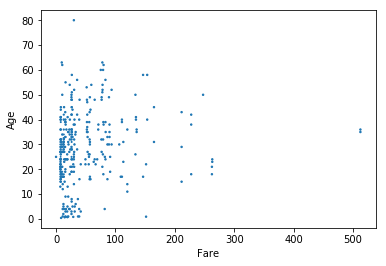

In [661]:
plt.scatter(data_by_location['Fare'],data_by_location['Age'],s=scaled_entries)
plt.xlabel('Fare')
plt.ylabel('Age')

#通过绘图得知在泰坦尼克船上，获救的人集中在Fare较低（0,50]，年龄集中在10岁以上35岁以下乘客中的几率比较大

In [662]:
data_by_location = titanic_df.groupby(['Parch','SibSp'],as_index=False).mean()

In [663]:
data_by_location.head()

,Parch,SibSp,PassengerId,Survived,Pclass,Age,Fare
0,0,0,458.000000,0.303538,2.400372,31.623836,21.242689
1,0,1,399.609756,0.520325,1.959350,31.813008,42.610402
2,0,2,373.250000,0.250000,2.437500,31.750000,41.411200
3,0,3,406.500000,1.000000,2.500000,31.500000,18.425000
4,1,0,455.657895,0.657895,1.789474,29.432105,73.470400


In [664]:
data_by_location.head()['SibSp']

0    0
1    1
2    2
3    3
4    0
Name: SibSp, dtype: int64

In [665]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,u'Parch')

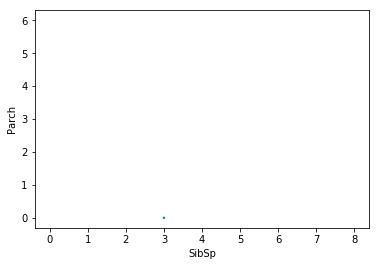

In [678]:
plt.scatter(data_by_location['SibSp'],data_by_location['Parch'],s=scaled_entries)
plt.xlabel('SibSp')
plt.ylabel('Parch')

#no parents or siblings passagers survived percentage is lower.